In [2]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings

In [3]:
warnings.filterwarnings("ignore")


In [5]:
data=pd.read_csv('car data.csv')

In [6]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
data


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [9]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [10]:
data =data.dropna()

In [14]:
data = data.drop_duplicates()

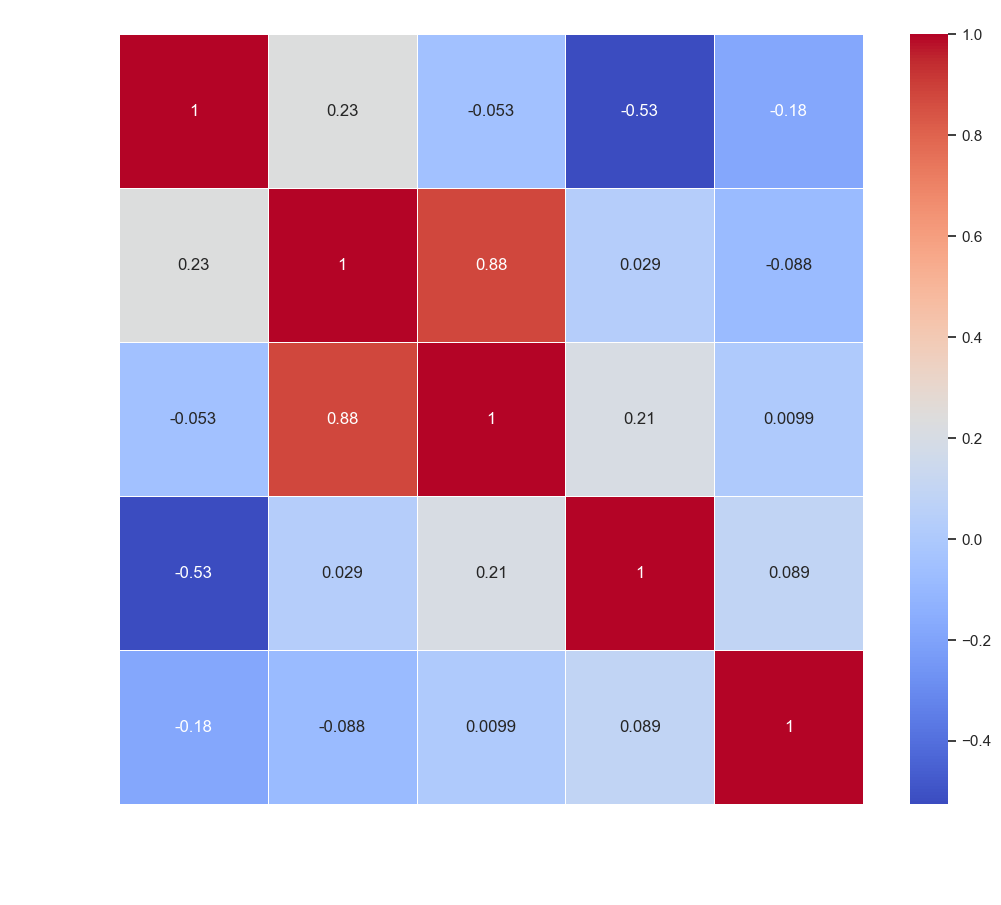

In [17]:
plt.style.use('dark_background')
sns.set_theme(style="darkgrid")

if 'price' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data['price'], kde=True, color='cyan')
    plt.title('Distribution of Car Prices', color='white', fontsize=16)
    plt.xlabel('Price', color='white')
    plt.ylabel('Count', color='white')
    plt.xticks(color='white')
    plt.yticks(color='white')
    plt.show()

numeric_data = data.select_dtypes(include='number')

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', color='white', fontsize=16)
plt.xticks(color='white', rotation=45)
plt.yticks(color='white', rotation=0)
plt.show()

In [38]:
feature_cols = [
    'symboling', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
    'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height',
    'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system',
    'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm',
    'city-mpg', 'highway-mpg'
]

target_col = 'price'
feature_cols = [col for col in feature_cols if col in data.columns]

In [30]:
print(data.columns.tolist())

['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']


In [43]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = label_encoder.fit_transform(X[col])


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
feature_cols = [col for col in feature_cols if col in data.columns]

In [77]:
print(data.select_dtypes(include='number').columns)


Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner'], dtype='object')


In [81]:
print(data.columns)


Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')


In [82]:

y = data['Selling_Price']
X = data.drop(columns=['Selling_Price', 'Car_Name'])


In [83]:
X = pd.get_dummies(X, drop_first=True)


In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [85]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Model fitted successfully ")


Model fitted successfully 


In [86]:
from sklearn.metrics import mean_squared_error
import numpy as np

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("RMSE:", rmse)


RMSE: 1.8658375680950685


In [92]:
new_car_data = pd.DataFrame([{'symboling': 3,'fuel_type': 'gas','aspiration': 'std','num_doors': 'two','body_style': 'sedan','drive_wheels': 'fwd','engine_location': 'front','wheel_base': 100.0,
    'length': 180.6,
    'width': 68.8,
    'height': 56.0,
    'curb_weight': 2500,
    'engine_type': 'ohc',
    'num_cylinders': 'four',
    'engine size': 120,
    'fuel_system': 'mpfi',
    'bore': 3.50,
    'stroke': 2.80,
    'compression_ratio': 8.5,
    'horsepower': 110,
    'peak_rpm': 5500,
    'city_mpg': 30,
    'highway_mpg': 38
}])


In [93]:
new_car_data = pd.get_dummies(new_car_data)


In [94]:
new_car_data = new_car_data.reindex(columns=X.columns, fill_value=0)


In [96]:
predicted_price = model.predict(new_car_data)
print("Predicted Car Price:", predicted_price[0])


Predicted Car Price: -708.1863112854525


NameError: name 'y_pred' is not defined

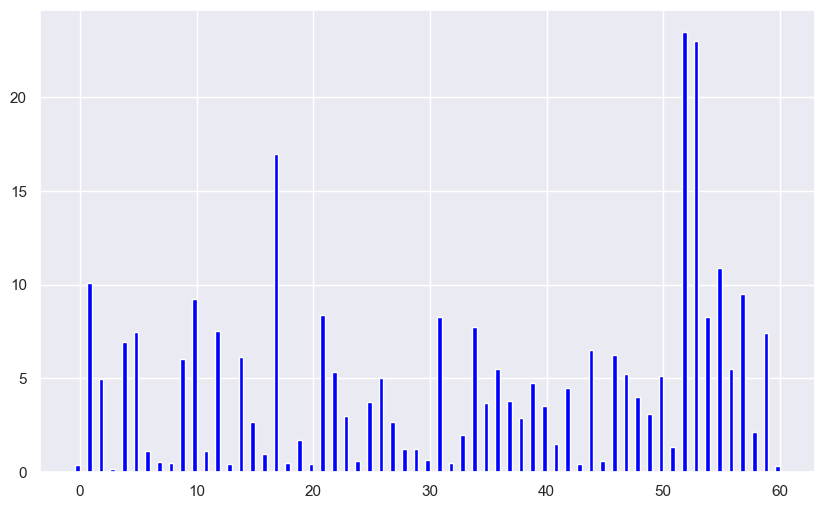

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# x positions for each car in the test set
x = np.arange(len(y_test))

plt.figure(figsize=(10,6))
plt.bar(x - 0.2, y_test.values, width=0.4, label='Actual Price', color='blue')
plt.bar(x + 0.2, y_pred, width=0.4, label='Predicted Price', color='orange')  # <-- use y_pred
plt.xlabel('Car Index in Test Set')
plt.ylabel('Price')
plt.title('Actual vs Predicted Car Prices')
plt.legend()
plt.show()
